In [17]:
#getting needed libraries 
import pandas as pd
#pip install numpy
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial import ConvexHull
import matplotlib.cm as cm

In [18]:
# Import enthalpy data

# define end members
endmember1 = "NiH"
endmember2 = "H"

# define compounds
# compounds: dictionary that has a compound identifier and lists the composition in terms of endmembers
compounds = {"NiH": [1,0], "H": [0,1], "Ni2H3": [2,1], "NiH2":[1,1], "NiH3":[1,2], "NiH4":[1,3], "NiH5":[1,4], "NiH6":[1,5], "NiH7":[1,6], "NiH8": [1,7], "Ni3H5":[3,2], "Ni3H13":[3,10]}

#label = dictionary that allow us to visualize known stable forms vs new forms we are trying
labels = {"NiH": "o", "H": "o", "Ni2H3": "o", "NiH3":"v"}

labels1 = {}
labels1["NiH"] = ["o"]
labels1["H"] = ["o"]
labels1["Ni2H3"] = ["o"]
labels1["NiH3"] = ["v"]

phases = {}
phase_enthalpies = {}
enthalpies = {}

# import enthalpies for compounds with only a single dataset/phase
# phases: dictionary that lists the structures for each compound (most often labeled by space group symbol)
# phase_enthalpies: dictionary that has the enthalpy data for each structure
# enthalpy data needs to be a simple two-column text file listing pressure (in GPa) and VASP 'free energy' (normalized by composition as stated in compounds above)
phases["NiH"] = ["NiH"]
phase_enthalpies["NiH"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNiH.dat")]
# phases["NiH3"] = ["NiH3"]
# phase_enthalpies["NiH3"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Ni Analysis/energiesNiH3-Pm-3m.dat")]
phases["Ni2H3"] = ["Ni2H3"]
phase_enthalpies["Ni2H3"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNi2H3.dat")]

phases["Ni3H5"] = ["Ni3H5"]
phase_enthalpies["Ni3H5"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNi3H5.dat")]

phases["Ni3H8"] = ["Ni3H8"]
phase_enthalpies["Ni3H8"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNi3H8.dat")]

phases["Ni3H13"] = ["Ni3H13"]
phase_enthalpies["Ni3H13"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNi3H13.dat")]

phases["NiH5"] = ["NiH5"]
phase_enthalpies["NiH5"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNiH5.dat")]


phases["NiH8"] = ["NiH8"]
phase_enthalpies["NiH8"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNiH8.dat")]
# phases["MnH3"] = ["MnH3"]
# phase_enthalpies["MnH3"] = [np.loadtxt("MnH3/I4m-Pressure-PBE/G_vs_p.dat")]
# phases["MnH4"] = ["MnH4"]
# phase_enthalpies["MnH4"] = [np.loadtxt("MnH4/Pm-3m-Pressure-PBE/G_vs_p.dat")]
# phases["MnH8"] = ["MnH8"]
# phase_enthalpies["MnH8"] = [np.loadtxt("MnH8/P-1-Pressure-PBE/G_vs_p.dat")]

# import enthalpies for compounds with multiple phases
phases["H"] = ["P63m", "C2c"]
phase_enthalpies["H"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Fe Analysis/energiesHp63.dat"), np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Fe Analysis/energiesHc2c.dat")]
phases["NiH2"] = ["Fm", "I4mmm"]
phase_enthalpies["NiH2"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNiH2-Fm.dat"), np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNiH2-I4mmm.dat")]
phases["NiH3"] = ["Pm-3m", "Pm-3n"]
phase_enthalpies["NiH3"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNiH3-Pm-3m.dat"),np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNiH3-Pm-3n.dat")]

phases["NiH4"] = ["Cmmm","Imma", "P21m", "P213"]
phase_enthalpies["NiH4"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNiH4-Cmmm.dat"),np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNiH4-Imma.dat"), np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNiH4-P21m.dat"), np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNiH4-P213.dat")]

phases["NiH6"] = ["C2m","Cmmm"]
phase_enthalpies["NiH6"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNiH6-C2m.dat"),np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNiH6-Cmmm.dat")]

phases["NiH7"] = ["P62mcm","Pmmm"]

phase_enthalpies["NiH7"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNiH7-P62mcm.dat"), np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Convex Hull analysis/Ni Analysis/energiesNiH7-Pmmm.dat")]
# phases["CoH3"] = ["Cmmm", "Imma", "P21m", "P213"]
# phase_enthalpies["FeH4"] = [np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Fe Analysis/energiesFeH4-Cmmm.dat"), np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Fe Analysis/energiesFeH4-Imma.dat"), np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Fe Analysis/energiesFeH4-P21m.dat"), np.loadtxt("/Users/guilhermegarcia/GLCGarcia documents /University /3rd year 2023 /Summer Development Internship /Fe Analysis/energiesFeH4-P213.dat")]

    
#######################################################

#print(phase_enthalpies["H"][0][:,1])
#Normnalize for structure , numbers of Co's or number of H'set

phase_enthalpies["H"][0][:,1]=phase_enthalpies["H"][0][:,1]/16
phase_enthalpies["H"][1][:,1]=phase_enthalpies["H"][1][:,1]/24
phase_enthalpies["NiH"][0][:,1] = phase_enthalpies["NiH"][0][:,1]/4
phase_enthalpies["NiH2"][0][:,1] = phase_enthalpies["NiH2"][0][:,1]/4
phase_enthalpies["NiH2"][1][:,1] = phase_enthalpies["NiH2"][1][:,1]/4
phase_enthalpies["NiH3"][0][:,1] = phase_enthalpies["NiH3"][0][:,1]/1
phase_enthalpies["NiH3"][1][:,1] = phase_enthalpies["NiH3"][1][:,1]/2
phase_enthalpies["NiH4"][0][:,1] = phase_enthalpies["NiH4"][0][:,1]/4
phase_enthalpies["NiH4"][1][:,1] = phase_enthalpies["NiH4"][1][:,1]/4
phase_enthalpies["NiH4"][2][:,1] = phase_enthalpies["NiH4"][2][:,1]/2
phase_enthalpies["NiH4"][3][:,1] = phase_enthalpies["NiH4"][3][:,1]/4
phase_enthalpies["NiH5"][0][:,1] = phase_enthalpies["NiH5"][0][:,1]/4
phase_enthalpies["NiH6"][0][:,1] = phase_enthalpies["NiH6"][0][:,1]/4
phase_enthalpies["NiH6"][1][:,1] = phase_enthalpies["NiH6"][1][:,1]/4
phase_enthalpies["NiH7"][0][:,1] = phase_enthalpies["NiH7"][0][:,1]/2
phase_enthalpies["NiH7"][1][:,1] = phase_enthalpies["NiH7"][1][:,1]/2
phase_enthalpies["NiH8"][0][:,1] = phase_enthalpies["NiH8"][0][:,1]/4

phase_enthalpies["Ni3H5"][0][:,1] = phase_enthalpies["Ni3H5"][0][:,1]/1
phase_enthalpies["Ni3H8"][0][:,1] = phase_enthalpies["Ni3H8"][0][:,1]/3
phase_enthalpies["Ni3H13"][0][:,1] = phase_enthalpies["Ni3H13"][0][:,1]/2
phase_enthalpies["Ni2H3"][0][:,1] = phase_enthalpies["Ni2H3"][0][:,1]/4
#phase_enthalpies["CoH3"][0][:,1] = phase_enthalpies["CoH3"][0][:,1]/1

#print (phase_enthalpies["CoH2"])

# get pressure values, from end members
pressures = phase_enthalpies[endmember1][0][:,0]

# get stoichiometries and save compound names
stoichiometry = {}
stoich_names = {}
for cmpd in compounds.keys():
    stoich = compounds[cmpd][1]/(compounds[cmpd][0]+compounds[cmpd][1])
    stoichiometry[cmpd] = stoich
    stoich_names[stoich] = cmpd

# get minimal enthalpies for each multi-phase compound
for cmpd in phases.keys():
    print(cmpd, ": ", phases[cmpd])
    enth_tmp = np.ones([len(pressures),1+len(phases[cmpd])])*np.inf
    enth_tmp[:,0] = pressures
    for i, phase in enumerate(phases[cmpd]):
        for ip,p in enumerate(pressures):
            if p in phase_enthalpies[cmpd][i]:
                enth_tmp[ip,i+1] = phase_enthalpies[cmpd][i][np.where(phase_enthalpies[cmpd][i][:,0] == p)[0][0],1]
    enth_best = np.ones([len(pressures),2])*np.inf
    enth_best[:,0] = pressures
    enth_best[:,1] = [np.min(enth_tmp[x,1:]) for x in range(len(pressures))]
    enthalpies[cmpd] = enth_best
    #print (enthalpies)

NiH :  ['NiH']
Ni2H3 :  ['Ni2H3']
Ni3H5 :  ['Ni3H5']
Ni3H8 :  ['Ni3H8']
Ni3H13 :  ['Ni3H13']
NiH5 :  ['NiH5']
NiH8 :  ['NiH8']
H :  ['P63m', 'C2c']
NiH2 :  ['Fm', 'I4mmm']
NiH3 :  ['Pm-3m', 'Pm-3n']
NiH4 :  ['Cmmm', 'Imma', 'P21m', 'P213']
NiH6 :  ['C2m', 'Cmmm']
NiH7 :  ['P62mcm', 'Pmmm']


o
b
[ 0.         -0.02285981  0.79776173 -0.01753809  0.18891088  0.27773748
  0.31774601 -0.20190705  0.14040572  0.31535562  0.17076037  0.        ]
300.0
g
[ 0.         -0.04681496  0.762304   -0.04269556  0.12420663  0.25708559
  0.26262235 -0.13400815  0.1582531   0.27998214  0.16599911  0.        ]
500.0
r
[ 0.         -0.07132869  0.70914285 -0.09312178  0.04959841  0.15982558
  0.19097336  0.0398702   0.1831387   0.2378407   0.20537613  0.        ]
1000.0
c
[ 0.         -0.07403832  0.67812721 -0.10628458  0.02885942  0.14353208
  0.15990618  0.19044626  0.16365564  0.22019005  0.23705425  0.        ]
1500.0
m
[ 0.         -0.06815053  0.06656316 -0.10417942  0.03077964  0.14232881
  0.14872555  0.30328348  0.2054553   0.21504142  0.21724776  0.        ]
2000.0


<>:77: SyntaxWarning: invalid escape sequence '\D'
<>:77: SyntaxWarning: invalid escape sequence '\D'
/var/folders/tg/1rvyy6v13kq9w3s_hnykjpmc0000gp/T/ipykernel_9626/431973797.py:77: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$\Delta$H$_f$ [eV/atom]")


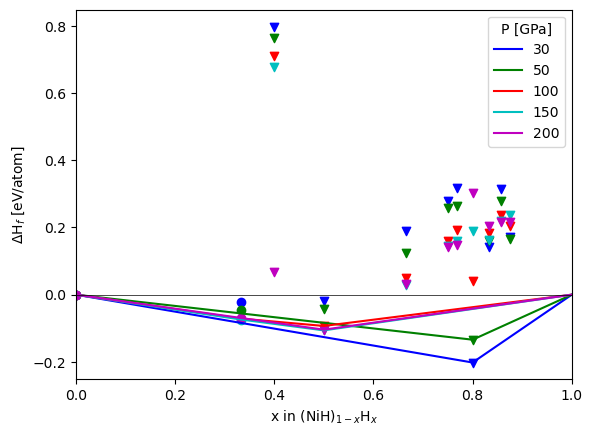

In [19]:
# Plot relative formation enthalpies

# plot these selected pressure points:
pressures_plot = ("30", "50", "100", "150", "200")

#######################################################

deltaHf = np.zeros([len(pressures), len(compounds), 2])

# store all relative enthalpies
for c,cmpd in enumerate(compounds.keys()):
    deltaHf[:,c,0] = compounds[cmpd][1]/(compounds[cmpd][0]+compounds[cmpd][1])
    deltaHf[:,c,1] = (enthalpies[cmpd][:,1] - compounds[cmpd][0]*enthalpies[endmember1][:,1] - compounds[cmpd][1]*enthalpies[endmember2][:,1])/(compounds[cmpd][0]+compounds[cmpd][1])

# sort relative enthalpies by stoichiometry
#print(deltaHf)

deltaHf = deltaHf[:,deltaHf[:,:,0].argsort()[0]]

# get convex hull points
hulls = [None]*len(pressures)
hullHf = [None]*len(pressures)

for ip in range(len(pressures)):
    hulls[ip] = ConvexHull(deltaHf[ip])
    # only keep hull points with non-positive enthalpy values
    hullHf[ip] = deltaHf[ip,hulls[ip].vertices[deltaHf[ip,hulls[ip].vertices,1]<=0]]
    # sort hull points by stoichiometry
    hullHf[ip] = hullHf[ip][hullHf[ip][:,0].argsort()]

# for p in pressures_plot:
#     print(deltaHf[i,:,1])
#     #idx = np.where(pressures == float(p))[0]
#     #print(idx)
#     plt.scatter(deltaHf[idx,:,0],deltaHf[idx,:,1], label = p)
#     plt.plot(hullHf[idx][:,0], hullHf[idx][:,1])

a = 0

#print(labels1["H"])

labels2 = ("o", "o", "v","v", "v" ,"v", "v" ,"v","v", "v" , "v", "o")
print(labels2[0])

# for i in (6, 10, 15, 20, 25, 30, 35):
    
#     p = pressures_plot[a]
#     print(deltaHf[i,:,1])
#     print(pressures[i])
#     a = a+1
#     #plt.scatter(deltaHf[i,:,0],deltaHf[i,:,1], label = p, marker=float(labels2[:]) )
#     plt.scatter(deltaHf[i,:,0],deltaHf[i,:,1], label = p )
#     plt.plot(hullHf[i][:,0], hullHf[i][:,1])

a = 0

colors = ("b", "g", "r", "c", "m", "y", "k")

for i in (6, 10, 15, 20, 25):
    
    p = pressures_plot[a]
    c = colors[a]
    print(c)
    print(deltaHf[i,:,1])
    print(pressures[i])
    a = a+1
    #plt.scatter(deltaHf[i,:,0],deltaHf[i,:,1], label = p, marker=float(labels2[:]) )

    for g in range((len(labels2)) - 1 ):
        l = labels2[g]
        plt.scatter(deltaHf[i,g,0],deltaHf[i,g,1], marker=l, color= c)

    plt.plot(hullHf[i][:,0], hullHf[i][:,1], label = p, color=c)
# plot settings
plt.plot([0,1],[0,0],color="black", linewidth = 0.5)
plt.xlabel("x in (NiH)$_{1-x}$H$_x$")
plt.ylabel("$\Delta$H$_f$ [eV/atom]")

plt.legend(title="P [GPa]")


plt.xlim((0.0,1.0))
#plt.ylim(top = 0.05, bottom = -0.5)
plt.show()

NiH    0.00000:  XXXXXXXXXXXXXXXXXXXXXXXXXX
Ni2H3  0.33333:  ---------ooXXXXXXXXXXXXXoo
Ni3H5  0.40000:  --------------------------
NiH2   0.50000:  -----------oXXXXXXXXXXXXXX
NiH3   0.66667:  --------------------------
NiH4   0.75000:  --------------------------
Ni3H13 0.76923:  --------------------------
NiH5   0.80000:  XXXXXXXXXXXXXo------------
NiH6   0.83333:  --------------------------
NiH7   0.85714:  --------------------------
NiH8   0.87500:  --------------------------
H      1.00000:  XXXXXXXXXXXXXXXXXXXXXXXXXX
[[2000.0], [1314.9139272763719], [0.0], [1339.0424500641298], [0.0], [0.0], [0.0], [787.6846116373548], [0.0], [0.0], [0.0], [2000.0]] [[0.0], [540.4591685150128], [0.0], [660.9575499358701], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]
[2000.0, 1314.9139272763719, 0.0, 1339.0424500641298, 0.0, 0.0, 0.0, 787.6846116373548, 0.0, 0.0, 0.0, 2000.0] [0.0, 540.4591685150128, 0.0, 660.9575499358701, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[0.0], [125.32212093469

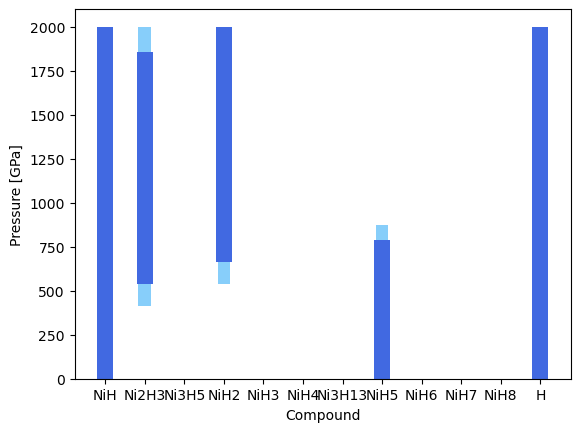

In [20]:
# Plot bar chart stability phase diagram

# define "metastability" in eV/entity distance from hull
meta = 0.03

#######################################################

# get distances from hull
deltaHull = np.ones([len(pressures),1+len(compounds)])*np.inf
deltaHull[:,0] = pressures

for ip in range(len(pressures)):
    for ic in range(len(compounds)):
        # is this composition on the hull?
        # yes - hull distance is zero
        if deltaHf[ip,ic,0] in hullHf[ip]:
            deltaHull[ip,ic+1] = 0.00

        # no - find nearest composition, work out hull distance
        else:
            idx = np.searchsorted(hullHf[ip][:,0], deltaHf[ip,ic,0])
            hull_comp_left = hullHf[ip][idx-1,0]
            hull_comp_right = hullHf[ip][idx,0]
            hull_Hf_left = hullHf[ip][idx-1,1]
            hull_Hf_right = hullHf[ip][idx,1]
            deltaHull[ip,ic+1] = deltaHf[ip,ic,1] - hull_Hf_left*(hull_comp_right - deltaHf[ip,ic,0])/(hull_comp_right-hull_comp_left) - hull_Hf_right*(deltaHf[ip,ic,0] - hull_comp_left)/(hull_comp_right-hull_comp_left)

# rudimentary text-based output of stability ranges
for ic in range(len(compounds)):
    print("{0:6s} {1:.5f}:  ".format(stoich_names[deltaHf[0,ic,0]],deltaHf[0,ic,0]), end="")
    for ip in range(len(pressures)):
        if deltaHull[ip,ic+1]==0:
            print("X", end="")
        elif deltaHull[ip,ic+1]<=meta:
            print("o", end="")
        else:
            print("-", end="")
    print("")
            
# store stable/metastable/unstable information only
trinaryHull = np.transpose(np.where(deltaHull[:,1:]>0,1,0) + np.where(deltaHull[:,1:]>meta,1,0))
# lists of lists of start/finish pressures for stable/metastable/unstable regions
pressures_stable_starts = [[] for i in range(len(compounds))]
pressures_stable_ends   = [[] for i in range(len(compounds))]
pressures_meta_starts   = [[] for i in range(len(compounds))]
pressures_meta_ends     = [[] for i in range(len(compounds))]
pressures_unstable_starts = [[] for i in range(len(compounds))]
pressures_unstable_ends   = [[] for i in range(len(compounds))]
# detect changes in stability state and interpolate the pressures
for ic in range(len(compounds)):
    # initial state of each compound
    state = trinaryHull[ic,0]
    if state == 0:
        # initially stable:
        pressures_stable_starts[ic].append(0.0)
    elif state == 1:
        # initially metastable:
        pressures_meta_starts[ic].append(0.0)
    else:
        # initially unstable
        pressures_unstable_starts[ic].append(0.0)
    
    # now loop over subsequent pressures, note changes
    for ip in range(1,len(pressures)):
        new_state = trinaryHull[ic,ip]
        # no change in state
        if new_state == state:
            continue
        # unstable -> metastable
        elif state == 2 and new_state == 1:
            # onset pressure of metastability:
            px = (meta - deltaHull[ip,ic+1])/(deltaHull[ip-1,ic+1]-deltaHull[ip,ic+1])*pressures[ip-1] + (deltaHull[ip-1,ic+1]-meta)/(deltaHull[ip-1,ic+1]-deltaHull[ip,ic+1])*pressures[ip]
            pressures_meta_starts[ic].append(px)
            pressures_unstable_ends[ic].append(px)
            #print("u>m ",ic,ip,px)
        # unstable -> stable
        elif state == 2 and new_state == 0:
            # onset pressure of stability
            # use deltaHull from previous pressure, and neighbour enthalpies from current pressure
            deltaH1 = deltaHull[ip-1,ic+1]
            # hull, neighbouring compositions
            curr_comp = deltaHf[0,ic,0]
            hull_comp_idx = np.where(hullHf[ip][:,0] == curr_comp)[0][0]
            hull_comp_left = hullHf[ip][hull_comp_idx-1,0]
            hull_comp_right = hullHf[ip][hull_comp_idx+1,0]
            hull_Hf_left = hullHf[ip][hull_comp_idx-1,1]
            hull_Hf_right = hullHf[ip][hull_comp_idx+1,1]
            deltaH2 = hullHf[ip][hull_comp_idx,1] - hull_Hf_left*(hull_comp_right - deltaHf[ip,ic,0])/(hull_comp_right-hull_comp_left) - hull_Hf_right*(deltaHf[ip,ic,0] - hull_comp_left)/(hull_comp_right-hull_comp_left)
            px = (-deltaH2)/(deltaH1-deltaH2)*pressures[ip-1] + (deltaH1)/(deltaH1-deltaH2)*pressures[ip]
            pressures_stable_starts[ic].append(px)
            pressures_unstable_ends[ic].append(px)
            #print("u>s ",ic,ip,px," : ",curr_comp, hull_comp_left, hull_comp_right, hull_Hf_left, hull_Hf_right, hullHf[ip][hull_comp_idx,1], deltaH1,deltaH2)
        # metastable -> stable
        elif state == 1 and new_state == 0:
            # onset of stability (from meta)
            # same maths as previous case
            deltaH1 = deltaHull[ip-1,ic+1]
            # hull, neighbouring compositions
            curr_comp = deltaHf[0,ic,0]
            hull_comp_idx = np.where(hullHf[ip][:,0] == curr_comp)[0][0]
            hull_comp_left = hullHf[ip][hull_comp_idx-1,0]
            hull_comp_right = hullHf[ip][hull_comp_idx+1,0]
            hull_Hf_left = hullHf[ip][hull_comp_idx-1,1]
            hull_Hf_right = hullHf[ip][hull_comp_idx+1,1]
            deltaH2 = hullHf[ip][hull_comp_idx,1] - hull_Hf_left*(hull_comp_right - deltaHf[ip,ic,0])/(hull_comp_right-hull_comp_left) - hull_Hf_right*(deltaHf[ip,ic,0] - hull_comp_left)/(hull_comp_right-hull_comp_left)
            px = (-deltaH2)/(deltaH1-deltaH2)*pressures[ip-1] + (deltaH1)/(deltaH1-deltaH2)*pressures[ip]
            pressures_stable_starts[ic].append(px)
            pressures_meta_ends[ic].append(px)
            #print("m>s ",ic,ip,px," : ",curr_comp, hull_comp_left, hull_comp_right, deltaH1,deltaH2)
        # metastable -> unstable
        elif state == 1 and new_state == 2:
            # end of metastability
            px = (meta - deltaHull[ip-1,ic+1])/(deltaHull[ip,ic+1]-deltaHull[ip-1,ic+1])*pressures[ip] + (deltaHull[ip,ic+1]-meta)/(deltaHull[ip,ic+1]-deltaHull[ip-1,ic+1])*pressures[ip-1]
            pressures_meta_ends[ic].append(px)
            pressures_unstable_starts[ic].append(px)
            #print("m>u ",ic,ip,px)
        # stable -> metastable
        elif state == 0 and new_state == 1:
            # end of stability (going to meta)
            # same maths as higher up
            # hull, neighbouring compositions
            curr_comp = deltaHf[0,ic,0]
            hull_comp_idx = np.where(hullHf[ip-1][:,0] == curr_comp)[0][0]
            hull_comp_left = hullHf[ip-1][hull_comp_idx-1,0]
            hull_comp_right = hullHf[ip-1][hull_comp_idx+1,0]
            hull_Hf_left = hullHf[ip-1][hull_comp_idx-1,1]
            hull_Hf_right = hullHf[ip-1][hull_comp_idx+1,1]
            deltaH1 = hullHf[ip-1][hull_comp_idx,1] - hull_Hf_left*(hull_comp_right - deltaHf[ip-1,ic,0])/(hull_comp_right-hull_comp_left) - hull_Hf_right*(deltaHf[ip-1,ic,0] - hull_comp_left)/(hull_comp_right-hull_comp_left)
            deltaH2 = deltaHull[ip,ic+1]
            px = (-deltaH1)/(deltaH2-deltaH1)*pressures[ip] + (deltaH2)/(deltaH2-deltaH1)*pressures[ip-1]
            pressures_stable_ends[ic].append(px)
            pressures_meta_starts[ic].append(px)
            #print("s>m ",ic,ip,px," : ",curr_comp, hull_comp_left, hull_comp_right, deltaH1,deltaH2)
        # stable -> unstable
        elif state == 0 and new_state == 2:
            # end of stability (going unstable)
            # same maths as higher up
            # hull, neighbouring compositions
            curr_comp = deltaHf[0,ic,0]
            hull_comp_idx = np.where(hullHf[ip-1][:,0] == curr_comp)[0][0]
            hull_comp_left = hullHf[ip-1][hull_comp_idx-1,0]
            hull_comp_right = hullHf[ip-1][hull_comp_idx+1,0]
            hull_Hf_left = hullHf[ip-1][hull_comp_idx-1,1]
            hull_Hf_right = hullHf[ip-1][hull_comp_idx+1,1]
            deltaH1 = hullHf[ip-1][hull_comp_idx,1] - hull_Hf_left*(hull_comp_right - deltaHf[ip-1,ic,0])/(hull_comp_right-hull_comp_left) - hull_Hf_right*(deltaHf[ip-1,ic,0] - hull_comp_left)/(hull_comp_right-hull_comp_left)
            deltaH2 = deltaHull[ip,ic+1]
            px = (-deltaH1)/(deltaH2-deltaH1)*pressures[ip] + (deltaH2)/(deltaH2-deltaH1)*pressures[ip-1]
            pressures_stable_ends[ic].append(px)
            pressures_unstable_starts[ic].append(px)
            print("s>u ",ic,ip,px," : ",curr_comp, hull_comp_left, hull_comp_right, deltaH1,deltaH2)
    
        state = new_state    

    # final pressure point, record final state
    state = trinaryHull[ic,-1]
    if state == 0:
        # ends stable:
        pressures_stable_ends[ic].append(pressures[-1])
    elif state == 1:
        # ends metastable:
        pressures_meta_ends[ic].append(pressures[-1])
    else:
        # ends unstable:
        pressures_unstable_ends[ic].append(pressures[-1])
    

# produce bar chart of all stable/metastable/unstable regions

#  plot settings
width = 0.4
# compound names
cmpd_names = []
for ic in range(len(compounds)):
    cmpd_names.append(stoich_names[deltaHf[0,ic,0]])

# get the maximum number of regions for each state in each compound
# (to bar chart them all properly)
num_stable_ranges = []
for ic in range(len(pressures_stable_starts)):
    num_stable_ranges.append(len(pressures_stable_starts[ic]))
depth_stable_ranges = max(num_stable_ranges)
num_meta_ranges = []
for ic in range(len(pressures_meta_starts)):
    num_meta_ranges.append(len(pressures_meta_starts[ic]))
depth_meta_ranges = max(num_meta_ranges)
num_unstable_ranges = []
for ic in range(len(pressures_unstable_starts)):
    num_unstable_ranges.append(len(pressures_unstable_starts[ic]))
depth_unstable_ranges = max(num_unstable_ranges)
#print(depth_stable_ranges, depth_meta_ranges, depth_unstable_ranges)

# bar chart everything
# first, stable phases
for nreg in range(depth_stable_ranges):
    bar_widths = []
    bar_bottoms = []
    for ic in range(len(compounds)):
        bar_widths.append([])
        bar_bottoms.append([])
        if len(pressures_stable_starts[ic]) > nreg:
            bar_widths[ic].append(pressures_stable_ends[ic][nreg]-pressures_stable_starts[ic][nreg])
            bar_bottoms[ic].append(pressures_stable_starts[ic][nreg])
        else:
            bar_widths[ic].append(0.0)
            bar_bottoms[ic].append(0.0)
    print(bar_widths, bar_bottoms)
    widths_flattened = [ x for ic in bar_widths for x in ic]
    bottoms_flattened = [ x for ic in bar_bottoms for x in ic]
    print(widths_flattened, bottoms_flattened)
    plt.bar(cmpd_names, widths_flattened, width, bottom = bottoms_flattened, color="royalblue")

# next, metastable phases
for nreg in range(depth_meta_ranges):
    bar_widths = []
    bar_bottoms = []
    for ic in range(len(compounds)):
        bar_widths.append([])
        bar_bottoms.append([])
        if len(pressures_meta_starts[ic]) > nreg:
            bar_widths[ic].append(pressures_meta_ends[ic][nreg]-pressures_meta_starts[ic][nreg])
            bar_bottoms[ic].append(pressures_meta_starts[ic][nreg])
        else:
            bar_widths[ic].append(0.0)
            bar_bottoms[ic].append(0.0)
    print(bar_widths, bar_bottoms)
    widths_flattened = [ x for ic in bar_widths for x in ic]
    bottoms_flattened = [ x for ic in bar_bottoms for x in ic]
    print(widths_flattened, bottoms_flattened)
    plt.bar(cmpd_names, widths_flattened, 0.8*width, bottom = bottoms_flattened, color="lightskyblue")


# more plot settings

plt.xlabel("Compound")
plt.ylabel("Pressure [GPa]")
plt.show() 

<>:40: SyntaxWarning: invalid escape sequence '\D'
<>:40: SyntaxWarning: invalid escape sequence '\D'
/var/folders/tg/1rvyy6v13kq9w3s_hnykjpmc0000gp/T/ipykernel_9626/1903988998.py:40: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$\Delta$H$_f$ [eV/f.u.]")


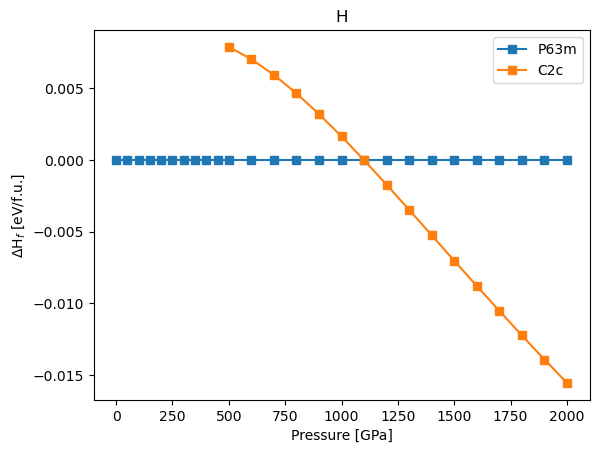

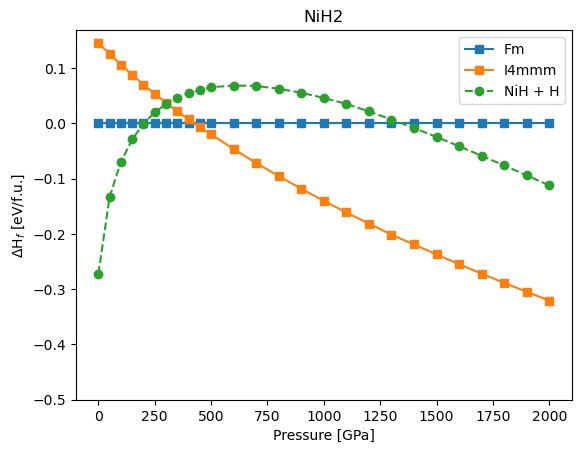

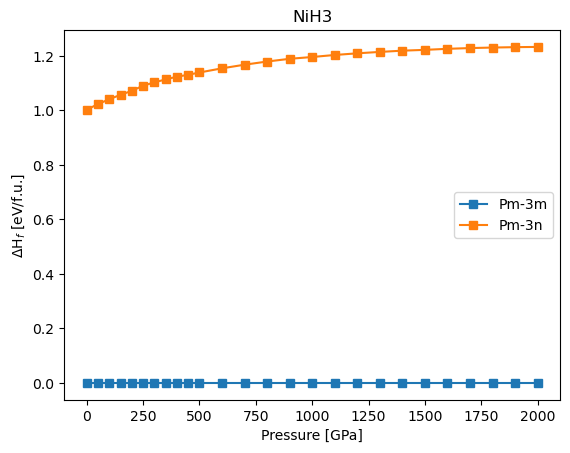

In [21]:
# Plot desired relative enthalpies

# define the baseline phase for each compound
Hf_base = {}
Hf_base["H"] = "P63m"
Hf_base["NiH2"] = "Fm"
Hf_base["NiH3"] = "Pm-3m"
#Hf_base["FeH4"] = "Cmmm"

#define (optional) escape reaction for each compound
Hf_escape = {}
Hf_escape["NiH2"] = [["NiH", "H"]]
# Hf_escape["FeH4"] = [["FeH3", "H"]]

# function to obtain and plot relative enthalpies
def plot_dH_vs_pressure(cmpd, ylim=(None,None)):
    base_idx = phases[cmpd].index(Hf_base[cmpd])
    enth_base = np.ones([len(pressures),1+len(phases[cmpd])])*np.inf
    enth_base[:,0] = pressures
    for i, phase in enumerate(phases[cmpd]):
        for ip,p in enumerate(pressures):
            if p in phase_enthalpies[cmpd][i]:
                enth_base[ip,i+1] = phase_enthalpies[cmpd][i][np.where(phase_enthalpies[cmpd][i][:,0] == p)[0][0],1] - phase_enthalpies[cmpd][base_idx][ip,1]
        plt.plot(enth_base[:,0], enth_base[:,i+1], label=phase, marker="s")
    if cmpd in Hf_escape.keys():
        escape_base = np.ones([len(pressures),1+len(Hf_escape[cmpd])])*np.inf
        escape_base[:,0] = pressures
        for i, reaction in enumerate(Hf_escape[cmpd]):
            esc1 = reaction[0]
            esc2 = reaction[1]
            reactants = np.array([[compounds[esc1][0],compounds[esc2][0]],[compounds[esc1][1],compounds[esc2][1]]])
            product = np.array([compounds[cmpd][0],compounds[cmpd][1]])
            x = np.linalg.solve(reactants, product)
            for ip, p in enumerate(pressures):
                if p in enthalpies[esc1][:,0] and p in enthalpies[esc2][:,0]:
                    escape_base[ip,i+1] = x[0]*enthalpies[esc1][np.where(enthalpies[esc1][:,0] == p)[0][0],1] + x[1]*enthalpies[esc2][np.where(enthalpies[esc2][:,0] == p)[0][0],1] - phase_enthalpies[cmpd][base_idx][ip,1]
            plt.plot(escape_base[:,0], escape_base[:,i+1], marker='o', linestyle="dashed", label = esc1+" + "+esc2)
    plt.title(cmpd)
    plt.xlabel("Pressure [GPa]")
    plt.ylabel("$\Delta$H$_f$ [eV/f.u.]")
    plt.legend()
    plt.ylim(ylim)
    plt.show()
    
# list of plots to make
cmpd="H"
plot_dH_vs_pressure(cmpd)

cmpd="NiH2"
plot_dH_vs_pressure(cmpd, (-0.5,None))

cmpd="NiH3"
plot_dH_vs_pressure(cmpd, (None,None))

#cmpd="FeH4"
#plot_dH_vs_pressure(cmpd)